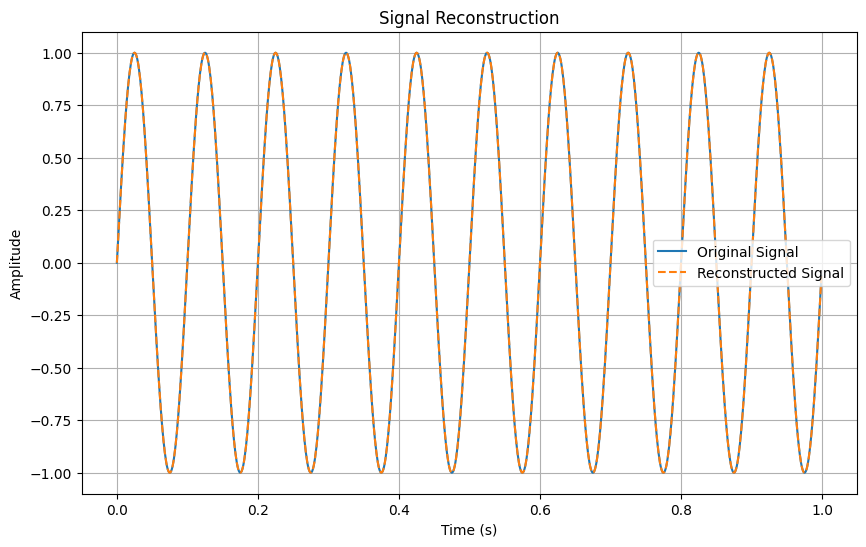

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

# Original signal parameters
f_signal = 10  # Frequency of the signal (Hz)
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
signal = np.sin(2 * np.pi * f_signal * t)  # Original signal

# Sampling parameters
f_sample_high = 50  # High sampling frequency (Hz)

# Sampling the signal
t_high = np.arange(0, 1, 1 / f_sample_high)
samples_high = np.sin(2 * np.pi * f_signal * t_high)

# Reconstructing the signal using high sampling rate
num_samples = 1000
reconstructed_signal = resample(samples_high, num_samples)

# Plotting the reconstruction
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', linestyle='--')
plt.title('Signal Reconstruction')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


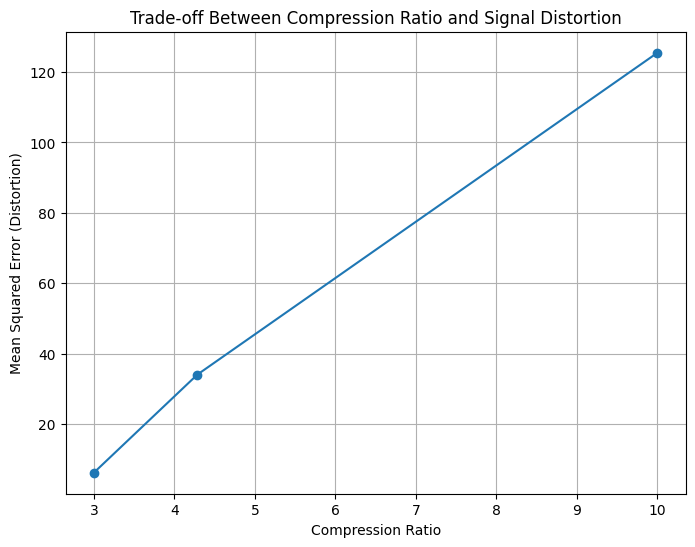

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

# Original Signal
signal = np.array([10, 20, 30, 40, 50, 60])
signal = np.tile(signal, 5)  # Increase the number of samples by repeating the signal

# Function for compression, reconstruction, and analysis
def analyze_tradeoff(signal, thresholds):
    original_size = len(signal)
    results = {"thresholds": [], "compression_ratios": [], "distortions": []}

    for threshold in thresholds:
        # Apply DCT
        dct_coeffs = dct(signal, norm='ortho')

        # Apply Thresholding (Compression)
        compressed_coeffs = np.where(abs(dct_coeffs) > threshold, dct_coeffs, 0)

        # Calculate Compression Ratio
        compressed_size = np.count_nonzero(compressed_coeffs)
        compression_ratio = original_size / compressed_size

        # Reconstruct Signal
        reconstructed_signal = idct(compressed_coeffs, norm='ortho')

        # Calculate Distortion (MSE)
        mse = np.mean((signal - reconstructed_signal) ** 2)

        # Store Results
        results["thresholds"].append(threshold)
        results["compression_ratios"].append(compression_ratio)
        results["distortions"].append(mse)

    return results

# Perform Analysis for the given Thresholds
thresholds = [10, 20, 30]  # Given threshold values
results = analyze_tradeoff(signal, thresholds)

# Plot Compression Ratio vs. Distortion
plt.figure(figsize=(8, 6))
plt.plot(results["compression_ratios"], results["distortions"], marker='o')
plt.title("Trade-off Between Compression Ratio and Signal Distortion")
plt.xlabel("Compression Ratio")
plt.ylabel("Mean Squared Error (Distortion)")
plt.grid()
plt.show()
